In [1]:
import librosa
import numpy as np
from scipy.fftpack import dct
import os 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import wave
import math
import scipy.io.wavfile as wav
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
from pydub import AudioSegment
from sklearn.linear_model import LogisticRegression

In [18]:
real = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\real\r_2.wav"
y, sr = librosa.load(real, sr=None)

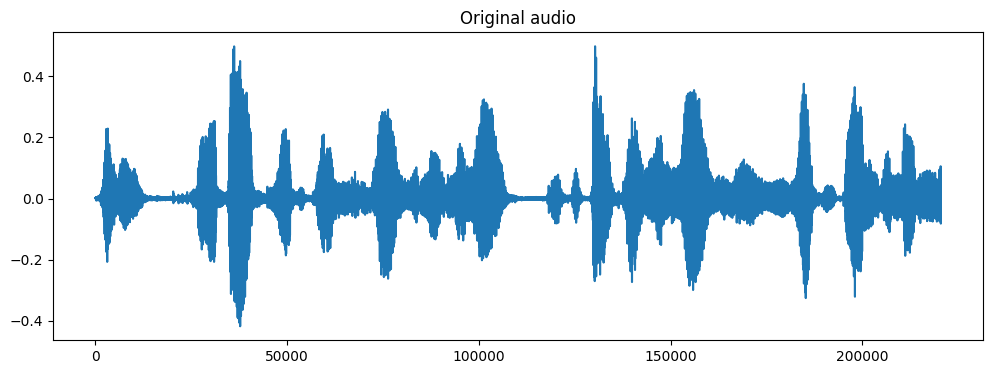

In [21]:
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.title('Original audio')
plt.plot(y)

Xuất hiện các noise là các phần phình ra ngoài phần thông tin chính của audio.

In [10]:
print(sr)

44100


Áp dụng Pre-emphasis để giảm noise

In [23]:
pre_emphasis_coeff = 0.97
y_filt = librosa.effects.preemphasis(y, coef=pre_emphasis_coeff)

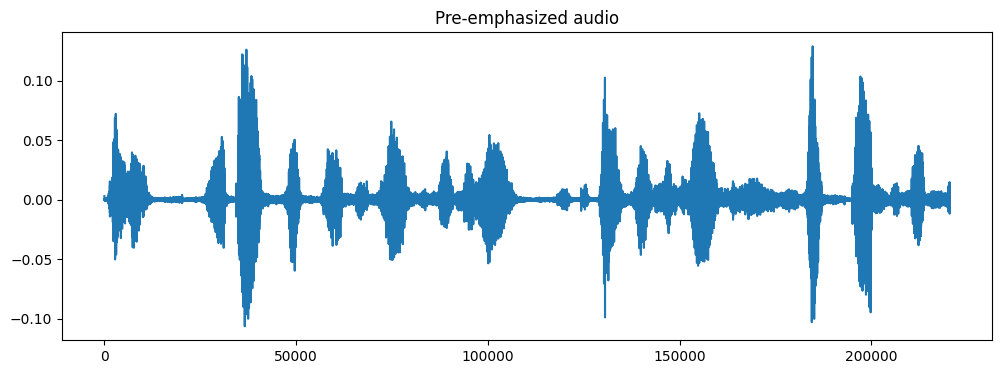

In [24]:
plt.figure(figsize=(12, 4))
plt.title('Pre-emphasized audio')
plt.plot(y_filt)

Thực hiện frame blocking ở frame_lenght = 25ms và hop lengh = 10ms (2 giá trị đặc dụng cho việc frame blocking ở speech preprocessing)

In [14]:
# Step 2: Frame blocking
frame_length = 0.025  # 25 ms
hop_length = 0.01  # 10 ms
frame_length_samples = int(frame_length * sr)
hop_length_samples = int(hop_length * sr)
frames = librosa.util.frame(y_filt, frame_length=frame_length_samples, hop_length=hop_length_samples).T

Number of Channels

In [15]:
def num_of_channels(path):

    # Load the audio file
    audio = AudioSegment.from_file(path)

    # Get the number of channels
    channels = audio.channels
    print(f'Number of channels: {channels}')
    return channels


In [19]:
lol = 0
for i in range(0,1972):
    path = f"C:\\Users\\VIET HOANG - VTS\\Desktop\\tien xu ly\\real\\r_{i}.wav"
    if num_of_channels(path) != 2:
        lol+=1
print(lol)

Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of channels: 2
Number of 

In [21]:
lol = 0
for i in range(0,1972):
    path = f"C:\\Users\\VIET HOANG - VTS\\Desktop\\tien xu ly\\fake\\f_{i}.wav"
    if num_of_channels(path) != 1:
        lol+=1
print(lol)

Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of channels: 1
Number of 

Num of channels trong file real là 2, còn file fake là 1

In [22]:
def get_bit_depth(file_path):
    with wave.open(file_path, 'rb') as wave_file:
        sample_width = wave_file.getsampwidth()
        bit_depth = sample_width * 8
        return bit_depth

In [26]:
lol = 0
for i in range(0,1972):
    path = f"C:\\Users\\VIET HOANG - VTS\\Desktop\\tien xu ly\\real\\r_{i}.wav"
    if get_bit_depth(path) != 16:
        lol +=1
print(lol)

0


In [27]:
lol = 0
for i in range(0,1972):
    path = f"C:\\Users\\VIET HOANG - VTS\\Desktop\\tien xu ly\\fake\\f_{i}.wav"
    if get_bit_depth(path) != 16:
        lol +=1
print(lol)

0


In [28]:
import numpy as np
import librosa
from sklearn.preprocessing import StandardScaler
from scipy.fftpack import dct

def preprocessing(audio_file, n_features):
    # Load the audio signal
    y, sr = librosa.load(audio_file, sr=None)

    # Step 1: Pre-emphasis
    pre_emphasis_coeff = 0.97
    y_filt = librosa.effects.preemphasis(y, coef=pre_emphasis_coeff)

    # Step 2: Frame blocking
    frame_length = 0.025  # 25 ms
    hop_length = 0.01  # 10 ms
    frame_length_samples = int(frame_length * sr)
    hop_length_samples = int(hop_length * sr)
    frames = librosa.util.frame(y_filt, frame_length=frame_length_samples, hop_length=hop_length_samples).T
    
    # Step 3: Windowing
    window = np.hamming(frame_length_samples)
    windowed_frames = frames * window

    # Step 4: Fast Fourier Transform (FFT)
    fft_size = 2048
    spectrogram = np.abs(np.fft.rfft(windowed_frames, n=fft_size))

    # Step 5: Mel frequency wrapping
    n_mels = 40  # Adjusted number of Mel bands
    mel_spec = librosa.feature.melspectrogram(S=spectrogram.T, sr=sr, n_mels=n_mels)

    # Step 6: Log Mel Spectrogram
    log_mel_spec = librosa.power_to_db(mel_spec)

    # Step 7: Discrete Cosine Transform (DCT) to get DCT features
    dct_features = dct(log_mel_spec, type=2, axis=0, norm='ortho')[:n_features]
    
    mean_dct = np.mean(dct_features, axis=1)

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Reshape the aggregated DCTs to 2D (needed for fitting the scaler)
    mean_dct_reshaped = mean_dct.reshape(-1, 1)

    # Fit and transform the data
    mean_dct_scaled = scaler.fit_transform(mean_dct_reshaped)

    # Flatten the scaled data back to 1D
    mean_dct_scaled_flat = mean_dct_scaled.flatten()

    return mean_dct_scaled_flat


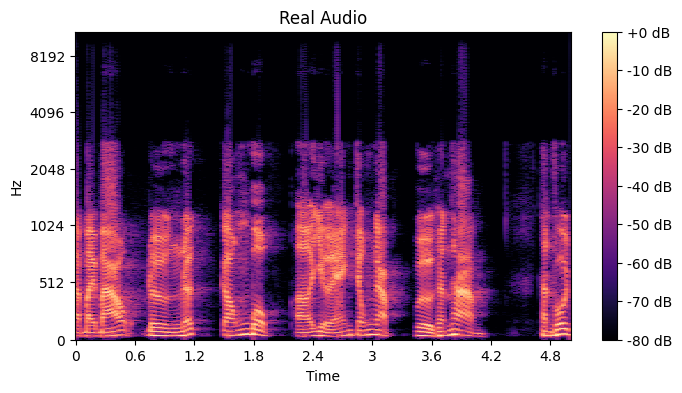

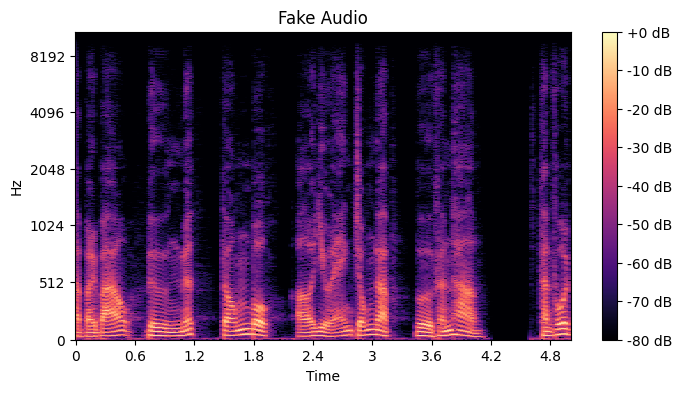

In [26]:
import librosa as lb
def get_spectrogram(y: np.ndarray) -> (np.ndarray, int):
    '''
    Compute the spectrogram of an audio signal.

    Parameters:
    y (np.ndarray): Audio time series.

    Returns:
    d (np.ndarray): Spectrogram of the audio signal, represented in decibels (dB).
    shape (tuple): Shape of the spectrogram (number of frequency bins, number of time frames).
    '''
    
    d = lb.stft(y)
    ad = lb.amplitude_to_db(np.abs(d), ref=np.max)
    
    return ad, ad.shape 
def plot_mel_spectrogram(m: np.ndarray, sr: int = 22050, size: tuple = (8, 4), title: str = "Mel Spectrogram of Audio"):
    '''
    Plot a Mel spectrogram.

    Parameters:
    s (np.ndarray): Mel spectrogram to plot. 
    sr (int, optional): Sampling rate of the audio. Default is 22050 Hz.
    size (tuple, optional): Size of the plot as (width, height). Default is (8, 4).
    title (str, optional): Title of the plot. Default is "Mel Spectrogram of Audio".
    '''
    
    plt.figure(figsize=size)
    lb.display.specshow(m, x_axis='time', y_axis='mel', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()
a, sr = lb.load(r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\compare\real.wav")
b = a[:400_000]
s1, s1_shape = get_spectrogram(y=b)
plot_mel_spectrogram(s1, title="Real Audio")
x, sr = lb.load(r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\compare\fake.wav")
s2, s2_shape = get_spectrogram(y=x)

plot_mel_spectrogram(s2, title="Fake Audio")

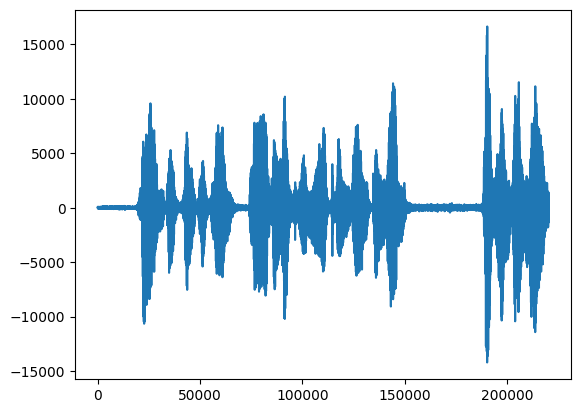

In [3]:
# Initialization
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy
import scipy.fft
import numpy as np
  # Sample rate - modify this to match your device (=try changing if the code below complains about sample rate)
seconds = 5  # Duration of recording
real = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\real\r_0.wav"
filename = real

# read from storage
fs, data = wavfile.read(filename)
data = data[:,0]

import IPython
IPython.display.display(IPython.display.Audio(data,rate=fs))
plt.plot(data)


Window length in samples 1323


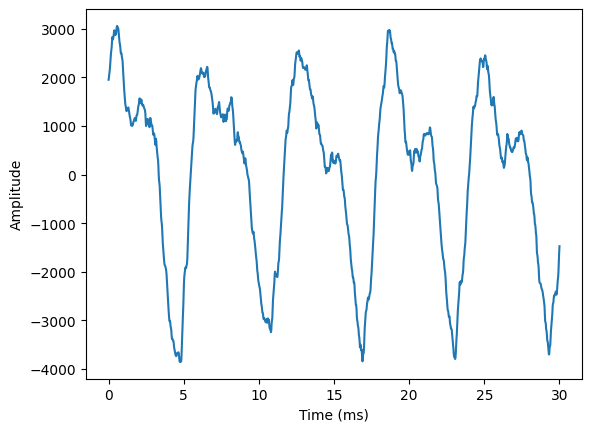

In [13]:
window_length_ms = 30

window_length = int(window_length_ms*fs/1000)
print('Window length in samples ' + str(window_length))

data_length = data.shape[0]

# choose segment from random position in sample
starting_position = np.random.randint(data_length - window_length)

time_vector = np.linspace(0,window_length_ms,window_length)

plt.plot(time_vector,data[starting_position:(starting_position+window_length)])
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.show()

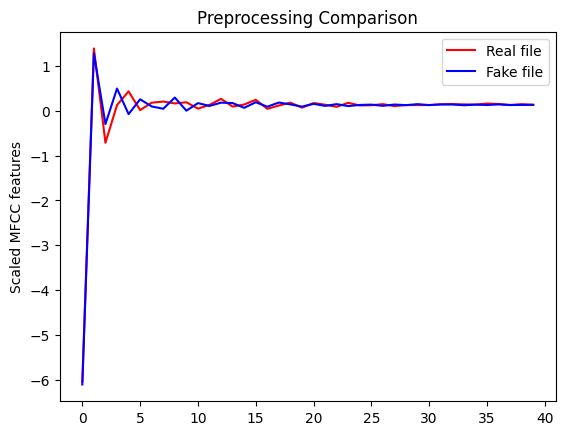

In [29]:
real = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\compare\real.wav"
fake = r"C:\Users\VIET HOANG - VTS\Desktop\tien xu ly\compare\fake.wav"
plt.plot([i for i in range(40)], [i for i in preprocessing(real, 68)], color='r', label='Real file') # Plotting the preprocessed values for the real audio
plt.plot([i for i in range(40)], [i for i in preprocessing(fake, 68)], color='b', label='Fake file') # Plotting the preprocessed values for the fake audio

# Adding labels and title
plt.ylabel('Scaled MFCC features')
plt.title('Preprocessing Comparison')

# Adding legends
plt.legend()

# Display the plot
plt.show()